## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

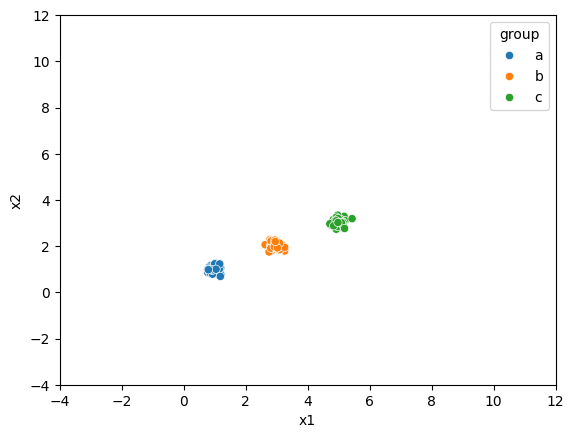

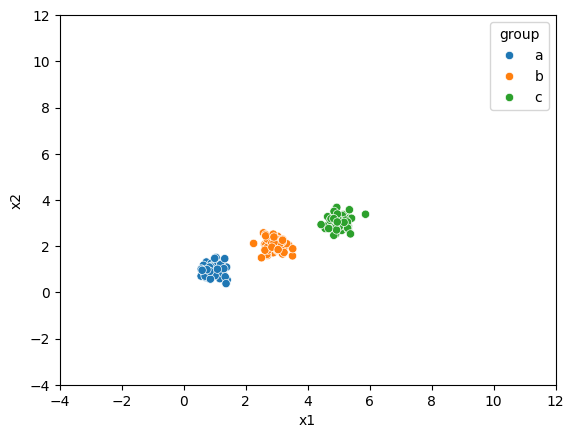

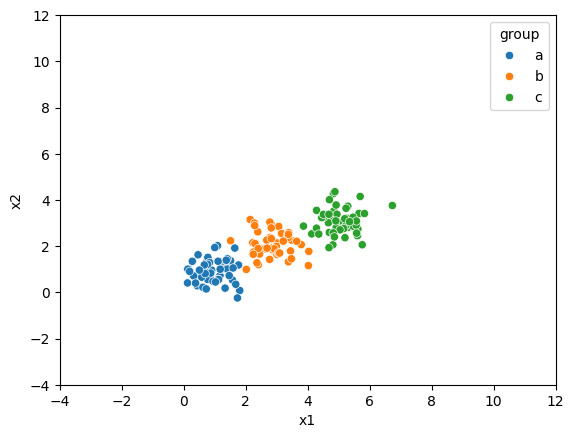

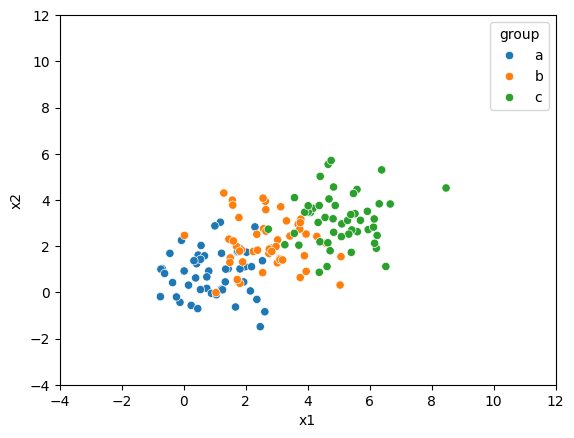

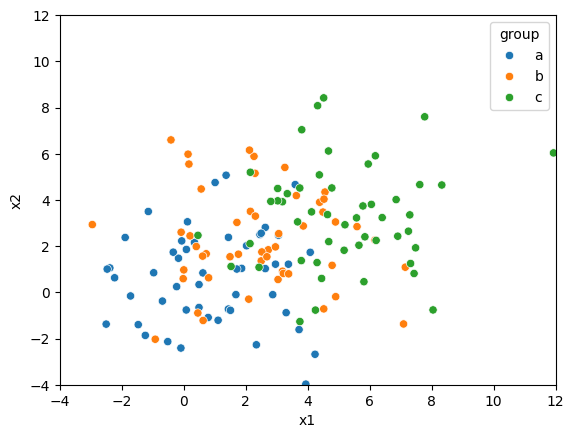

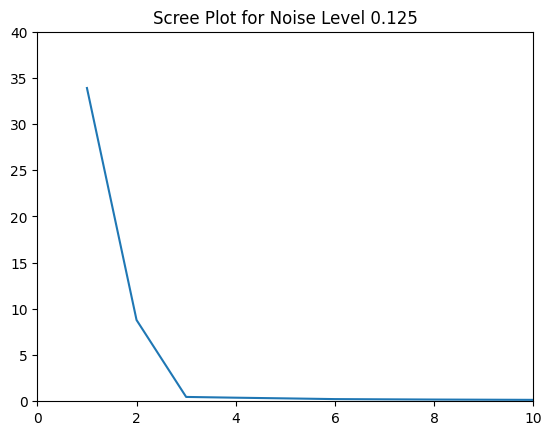

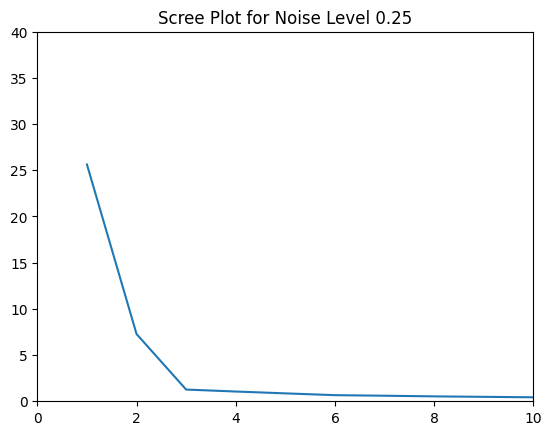

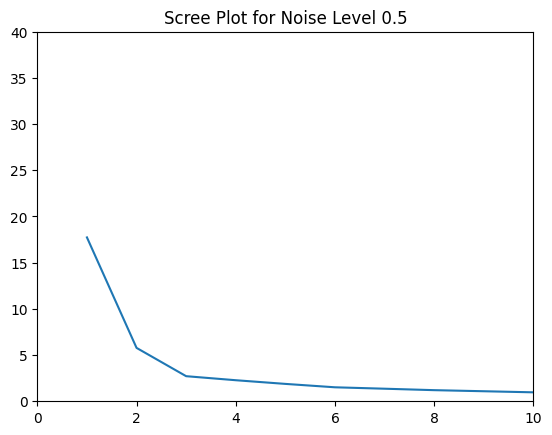

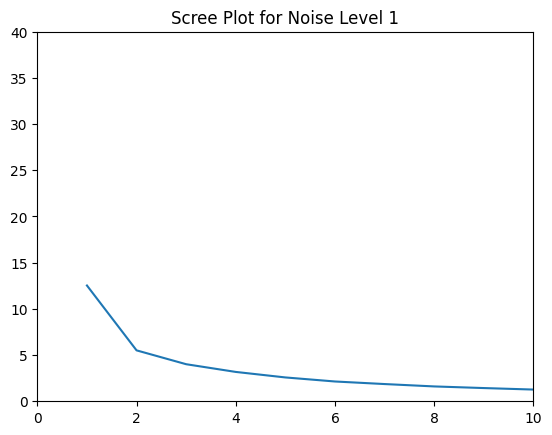

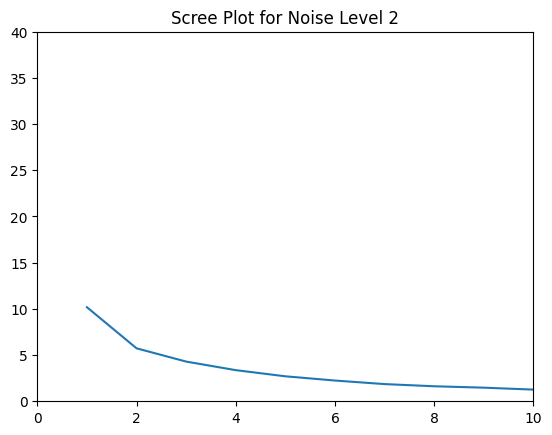

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import kmc

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

for x in [df0_125,df0_25,df0_5,df1_0,df2_0]:
    g = sns.scatterplot(x='x1',y='x2',hue='group',data=x)
    g.set(xlim=(-4,12),ylim=(-4,12))
    plt.show()

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

for nl, x in [(0.125, df0_125),(0.25, df0_25),(0.5, df0_5),(1, df1_0),(2, df2_0)]:
    X = x.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin)
    # Create a scree plot:
    k_bar = 10
    SSE = [] # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the model
        SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector
        
    scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE) # Create scree plot
    scree_plot.set_title(f'Scree Plot for Noise Level {str(nl)}')
    scree_plot.set(xlim=(0,10),ylim=(0,40))
    plt.show()

As the noise level increases, the clusters become less visually distinct and start to bleed into one another.

As the noise level increases, the SSE goes down, making it less clear where the elbow is and more difficult to determine a good value of $k$.

The elbow is basically the point of diminishing returns. When the data is not especially noisy, it's already somewhat clustered, so there's a clear point at which increasing the number of clusters is not going to do much. With noisier data, however, it's harder to separate everything into clustered, so you can just keep continually increasing $k$ without finding a clear point to stop.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

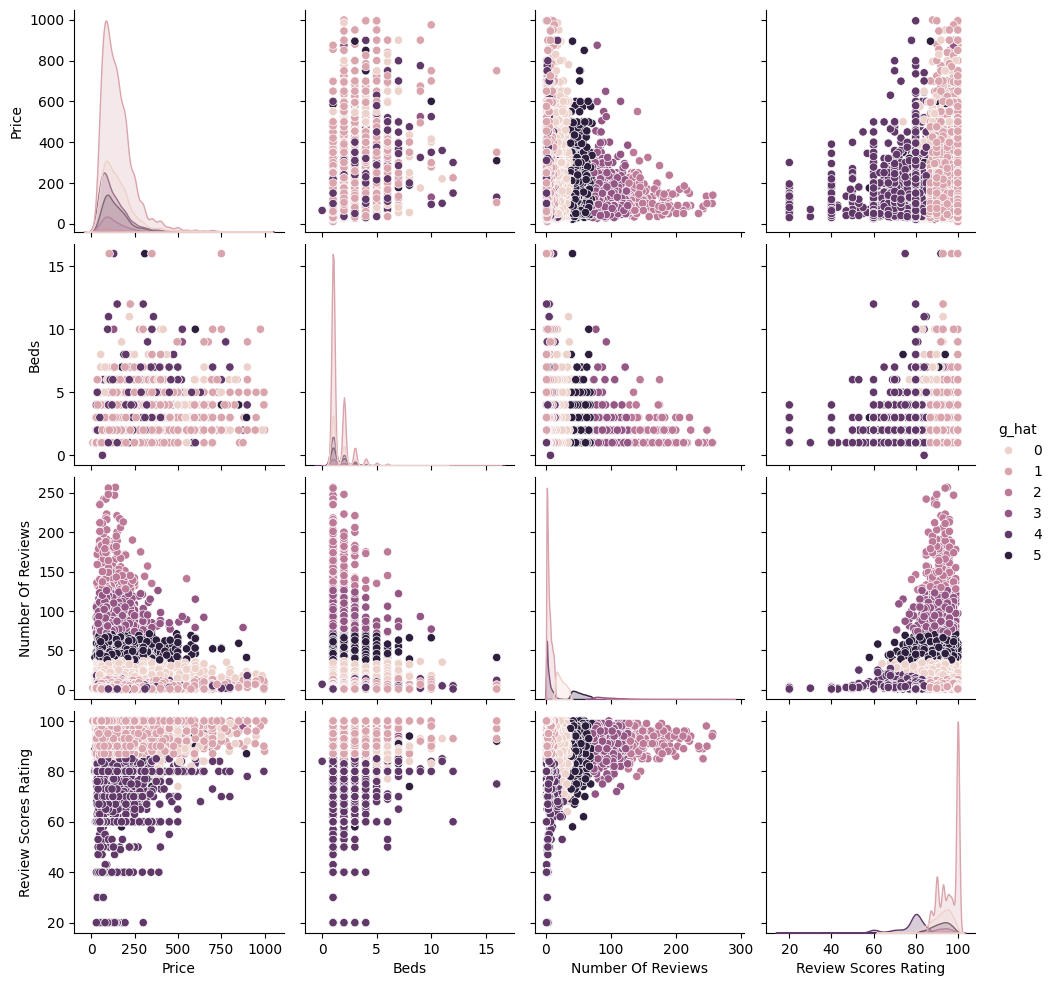

         count        mean         std   min   25%    50%     75%    max
g_hat                                                                   
0       4221.0  156.443023  103.056182  20.0  88.0  135.0  195.00  985.0
1      12121.0  154.825674  102.344835  10.0  85.0  130.0  195.00  999.0
2        167.0  124.670659   69.327792  33.0  79.0  100.0  162.50  550.0
3        743.0  134.965007   84.467566  27.0  80.0  114.0  165.00  875.0
4       2910.0  134.498282   95.649295  21.0  70.0  105.0  170.00  995.0
5       1898.0  146.393572   91.068828  22.0  89.0  125.0  179.75  895.0


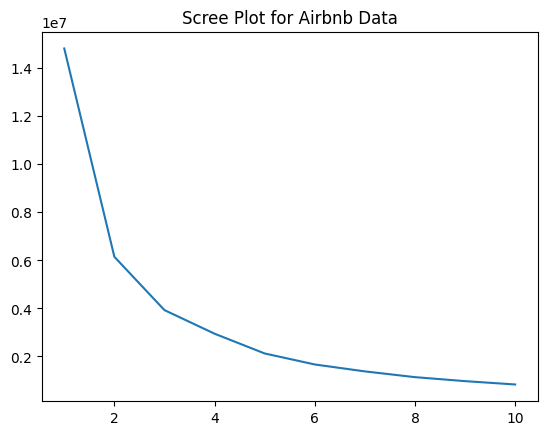

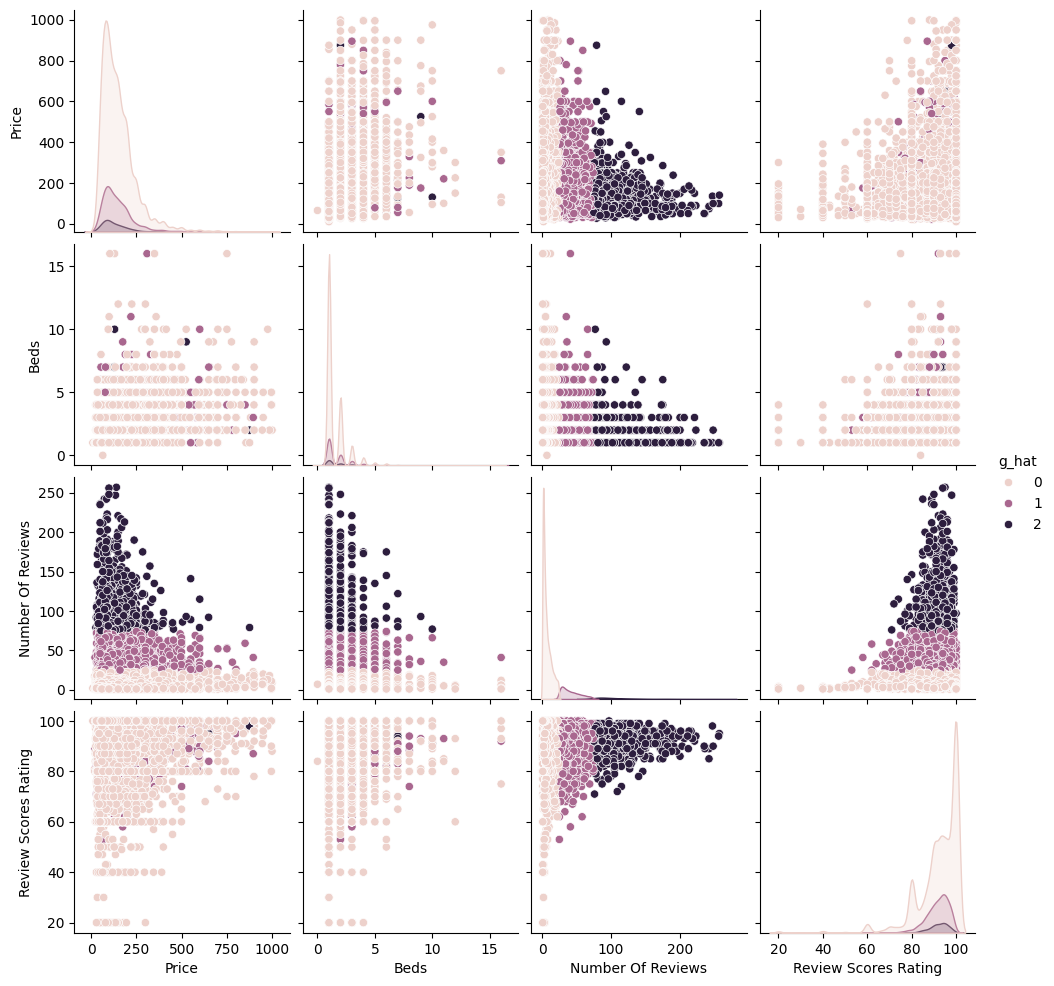

         count        mean         std   min   25%    50%    75%    max
g_hat                                                                  
0      17528.0  151.845961  101.892734  10.0  85.0  126.0  190.0  999.0
1       3688.0  150.010575   95.479991  22.0  89.0  125.0  185.0  895.0
2        844.0  133.337678   82.879028  27.0  80.0  110.0  165.0  875.0


In [43]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

df = pd.read_csv("data/airbnb_hw.csv")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df = df[["Price", "Beds", "Number Of Reviews", "Review Scores Rating"]]
df = df.dropna()
min_price = df["Price"].min()
max_price = df["Price"].max()
min_beds = df["Beds"].min()
max_beds = df["Beds"].max()
min_reviews = df["Number Of Reviews"].min()
max_reviews = df["Number Of Reviews"].max()
min_rating = df["Review Scores Rating"].min()
max_rating = df["Review Scores Rating"].max()
df.apply(maxmin)

X = df.loc[ : , ['Beds','Number Of Reviews','Review Scores Rating'] ]

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) # Create a model for k
model = model.fit(X) # Fit the model
df['g_hat'] = model.predict(X) # Predict values

# Re-normalize the centers, returning them to the scales of the original data, and plot:
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_beds = centers[:,0]*(max_beds-min_beds)+min_beds
centroid_reviews = centers[:,1]*(max_reviews-min_reviews)+min_reviews
centroid_rating = centers[:,2]*(max_rating-min_rating)+min_rating
g = sns.pairplot(df, hue='g_hat')
plt.show()
print(df.groupby('g_hat')["Price"].describe()) # cluster 0 has the highest rental prices on average (mean and median)

k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    X = df.loc[ : , ['Beds','Number Of Reviews','Review Scores Rating'] ]
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE) # Create scree plot
scree_plot.set_title('Scree Plot for Airbnb Data')
plt.show()

# let's say k = 3 is the elbow

X = df.loc[ : , ['Beds','Number Of Reviews','Review Scores Rating'] ]

model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for k
model = model.fit(X) # Fit the model
df['g_hat'] = model.predict(X) # Predict values

# Re-normalize the centers, returning them to the scales of the original data, and plot:
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_beds = centers[:,0]*(max_beds-min_beds)+min_beds
centroid_reviews = centers[:,1]*(max_reviews-min_reviews)+min_reviews
centroid_rating = centers[:,2]*(max_rating-min_rating)+min_rating
g = sns.pairplot(df, hue='g_hat')
plt.show()
print(df.groupby('g_hat')["Price"].describe()) # cluster 0 has the highest rental prices on average (mean and median)

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?